In [140]:
# data Frame
import pandas as pd 
# graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de Caculos

#Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

#Jerarquico

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#funciones 
from funciones_limpieza import remover_outliers

import warnings

# Deshabilitar los warnings
warnings.filterwarnings("ignore")

```
1. Leer el archivo Retail_Invoices.xlsx y realizar un análisis de calidad de datos, para
definir la calidad de la data entregada considerando valores anómalos, valores
faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los
datos considerando gráficos de distribuciones y correlaciones entre estos.

```

In [141]:
df= pd.read_excel('Retail_Invoices.xlsx')
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [142]:
print(df.head())

  InvoiceNo InvoiceDate  CustomerID  Quantity  price_total  StockCode
0    536365  2010-12-01       17850        40       139.12          7
1    536366  2010-12-01       17850        12        22.20          2
2    536367  2010-12-01       13047        83       278.73         12
3    536368  2010-12-01       13047        15        70.05          4
4    536369  2010-12-01       13047         3        17.85          1


In [143]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB
None


In [144]:
print(df.describe())

                         InvoiceDate    CustomerID      Quantity  \
count                          22190  22190.000000  22190.000000   
mean   2011-06-29 05:59:15.223073536  15238.498738    221.130599   
min              2010-12-01 00:00:00  12346.000000 -80995.000000   
25%              2011-03-29 00:00:00  13755.000000     30.000000   
50%              2011-07-08 00:00:00  15136.000000    120.000000   
75%              2011-10-10 00:00:00  16746.000000    254.000000   
max              2011-12-09 00:00:00  18287.000000  80995.000000   
std                              NaN   1733.149624   1170.215301   

         price_total     StockCode  
count   22190.000000  22190.000000  
mean      374.045327     18.333889  
min   -168469.600000      1.000000  
25%        87.962500      3.000000  
50%       241.505000     12.000000  
75%       418.022500     24.000000  
max    168469.600000    542.000000  
std      2018.482869     23.892111  


In [145]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'price_total',
       'StockCode'],
      dtype='object')

In [146]:
df=df.drop_duplicates()
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [147]:
df = df.dropna()
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [148]:

df_sin_outliers=remover_outliers(df)
df_sin_outliers

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22184,C581470,2011-12-08,17924,-4,-8.32,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


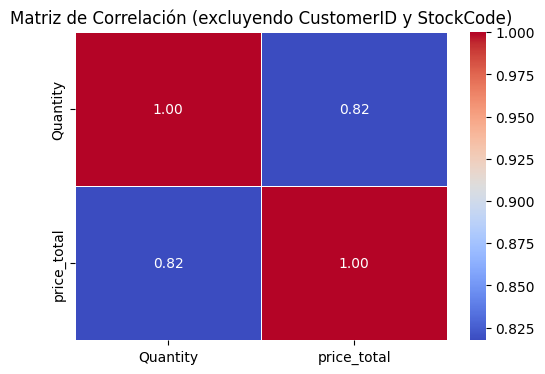

In [149]:
# Explorar correlaciones entre variables numéricas excluyendo CustomerID y StockCode
correlation_matrix = df_sin_outliers[['Quantity', 'price_total']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (excluyendo CustomerID y StockCode)')
plt.show()


```
2. Generar variables para la segmentación. Notar que la granularidad de la data es por
boleta y se necesita segmentar clientes, por lo que es necesario generar variables a
nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).
```

In [150]:
# Crear variables RFM para df_sin_outliers
df_rfm = pd.DataFrame()

# Calcular la Recencia (diferencia entre la fecha actual y la última compra del cliente)
ultima_compra = df_sin_outliers['InvoiceDate'].max()
df_rfm['Recencia'] = (ultima_compra - df_sin_outliers.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Calcular la Frecuencia (número total de compras realizadas por el cliente)
df_rfm['Frecuencia'] = df_sin_outliers.groupby('CustomerID')['InvoiceNo'].nunique()

# Calcular el Monto (suma total de dinero gastado por el cliente)
df_rfm['Monto'] = df_sin_outliers.groupby('CustomerID')['price_total'].sum()

# Visualizar las primeras filas del nuevo dataframe RFM
print(df_rfm.head())


            Recencia  Frecuencia    Monto
CustomerID                               
12347              2           6  3015.68
12348             75           2   677.00
12350            310           1   334.40
12352             36          10  2009.21
12353            204           1    89.00


```
3. Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas
variables.
```

In [151]:
# Añadir nuevas variables al DataFrame df_rfm
df_rfm['DuracionCliente'] = (df_sin_outliers.groupby('CustomerID')['InvoiceDate'].max() - df_sin_outliers.groupby('CustomerID')['InvoiceDate'].min()).dt.days
df_rfm['NumProductosUnicos'] = df_sin_outliers.groupby('CustomerID')['StockCode'].nunique()
df_rfm['PromedioGastoCompra'] = df_rfm['Monto'] / df_rfm['Frecuencia']
df_rfm

,Recencia,Frecuencia,Monto,DuracionCliente,NumProductosUnicos,PromedioGastoCompra
CustomerID,,,,,,
12347,2,6,3015.68,365,6,502.613333
12348,75,2,677.00,173,2,338.500000
12350,310,1,334.40,0,1,334.400000
12352,36,10,2009.21,260,8,200.921000
12353,204,1,89.00,0,1,89.000000
...,...,...,...,...,...,...
18280,277,1,180.60,0,1,180.600000
18281,180,1,80.82,0,1,80.820000
18282,7,3,176.60,119,3,58.866667


          Recencia   Frecuencia        Monto  DuracionCliente  \
count  3450.000000  3450.000000  3450.000000      3450.000000   
mean    100.477101     2.945797   610.602647       108.066087   
std      98.496324     2.198926   538.706999       118.915447   
min       0.000000     1.000000  -390.080000         0.000000   
25%      22.000000     1.000000   215.915000         0.000000   
50%      60.000000     2.000000   420.375000        58.000000   
75%     165.750000     4.000000   856.780000       206.750000   
max     364.000000    11.000000  2581.040000       371.000000   

       NumProductosUnicos  PromedioGastoCompra  
count         3450.000000          3450.000000  
mean             2.586957           214.346218  
std              1.742350           121.540957  
min              1.000000          -112.350000  
25%              1.000000           127.775500  
50%              2.000000           193.470750  
75%              4.000000           296.838000  
max              8.000

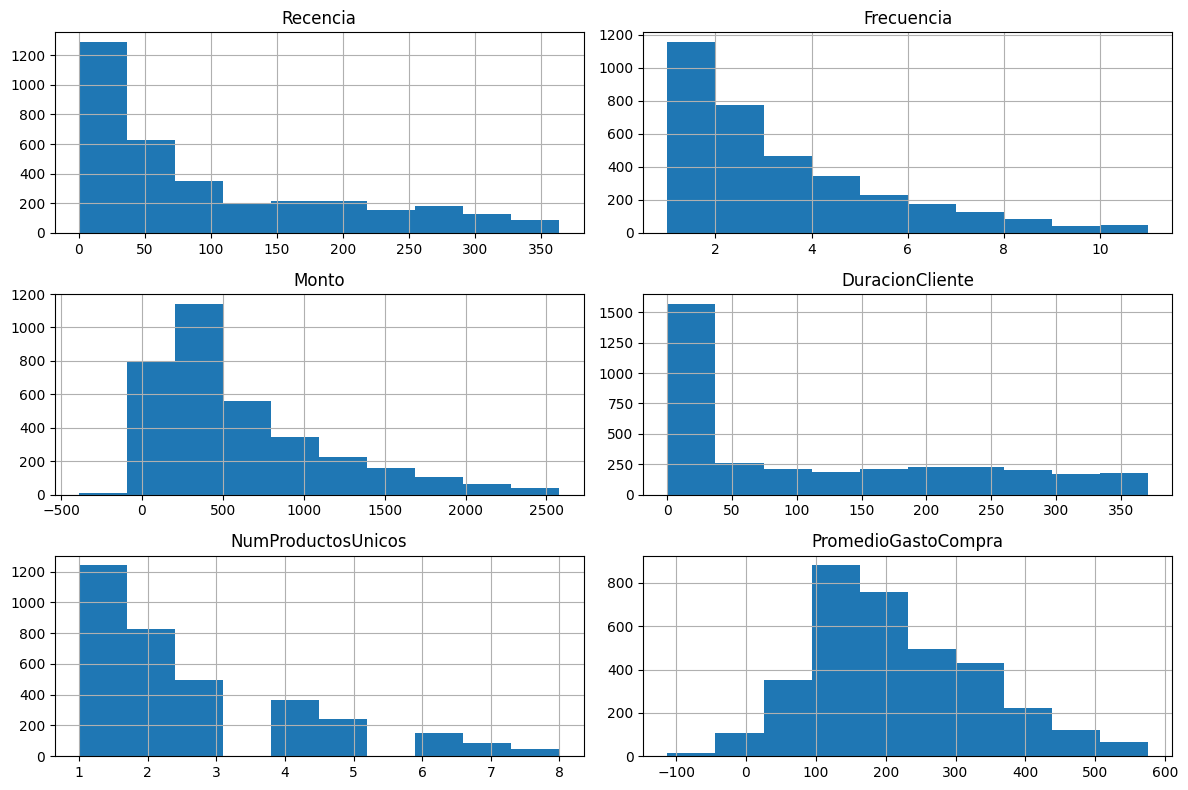

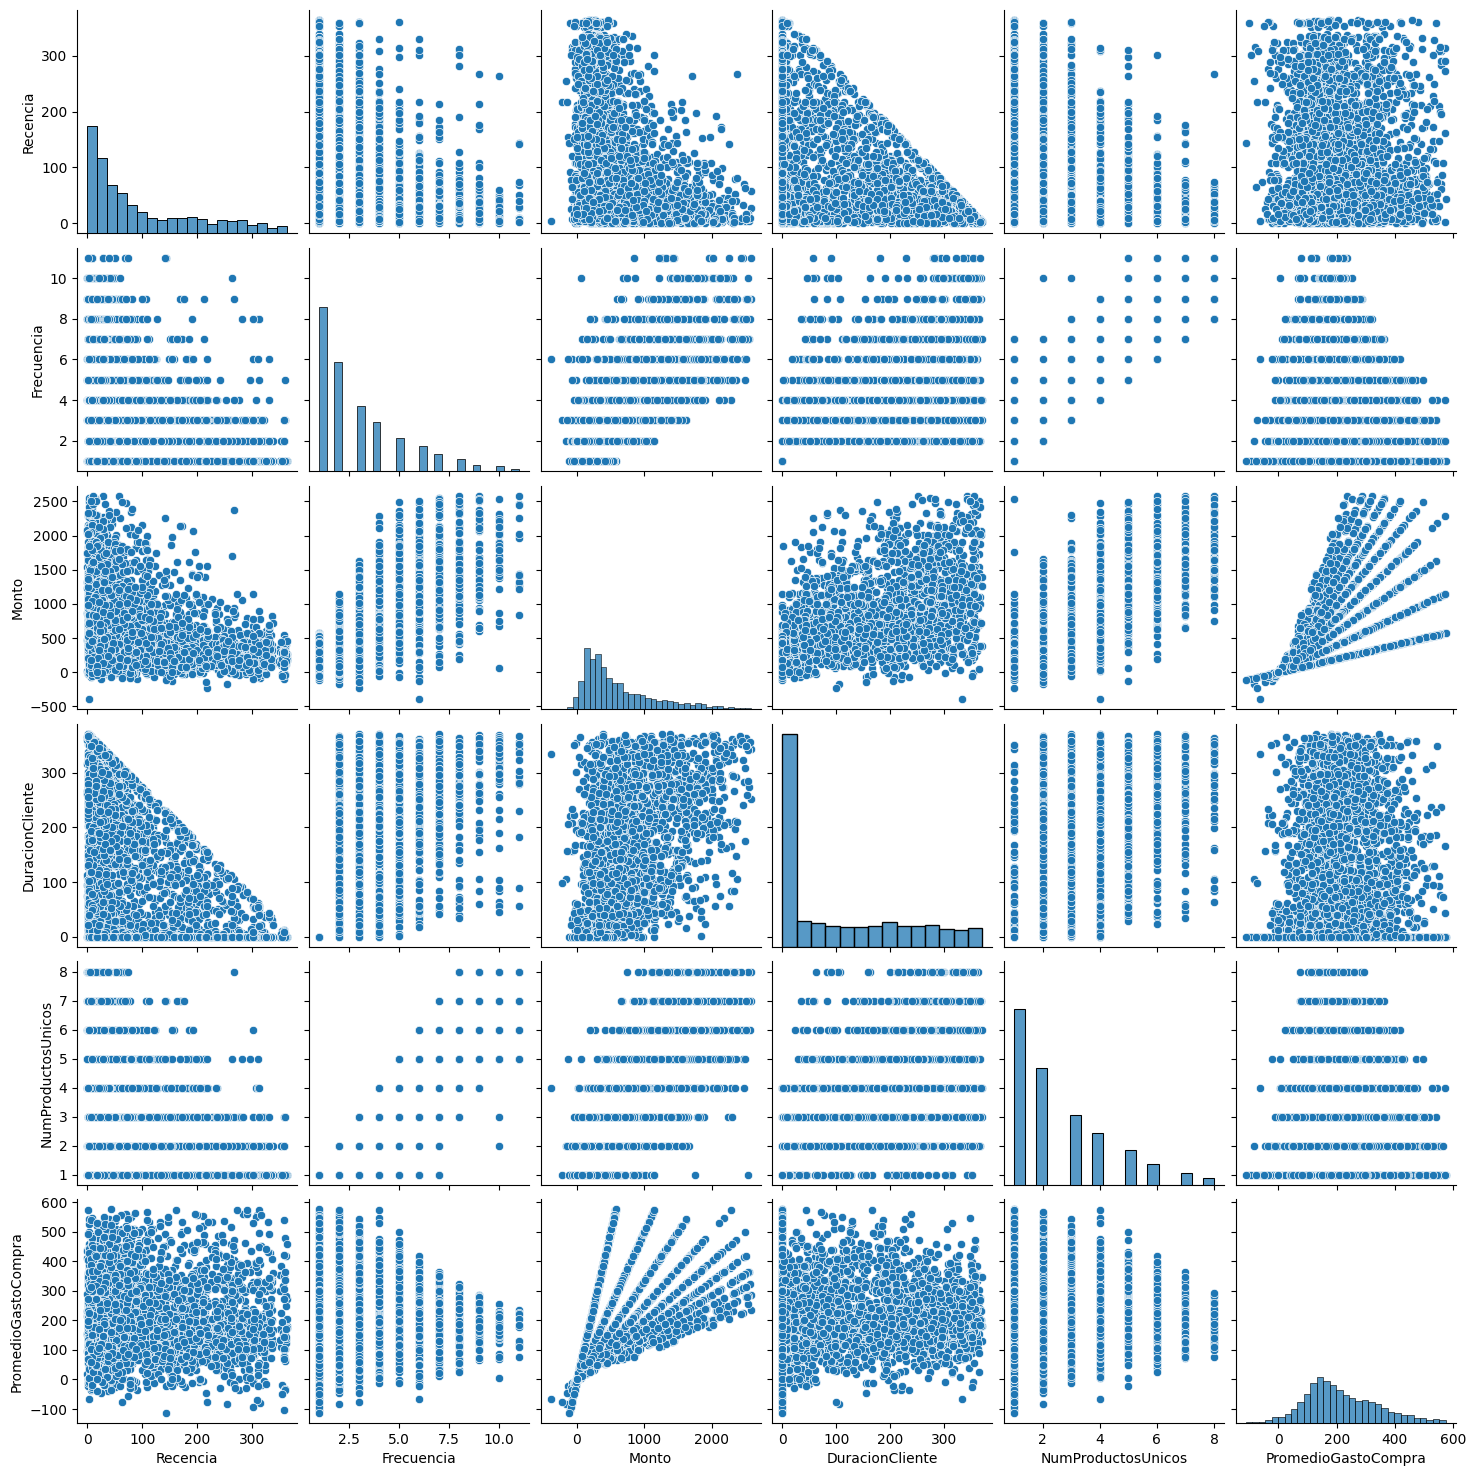

                     Recencia  Frecuencia     Monto  DuracionCliente  \
Recencia             1.000000   -0.372022 -0.352249        -0.447719   
Frecuencia          -0.372022    1.000000  0.760335         0.707347   
Monto               -0.352249    0.760335  1.000000         0.611816   
DuracionCliente     -0.447719    0.707347  0.611816         1.000000   
NumProductosUnicos  -0.387571    0.935949  0.777664         0.708214   
PromedioGastoCompra -0.047080   -0.077916  0.462207         0.003446   

                     NumProductosUnicos  PromedioGastoCompra  
Recencia                      -0.387571            -0.047080  
Frecuencia                     0.935949            -0.077916  
Monto                          0.777664             0.462207  
DuracionCliente                0.708214             0.003446  
NumProductosUnicos             1.000000            -0.023408  
PromedioGastoCompra           -0.023408             1.000000  


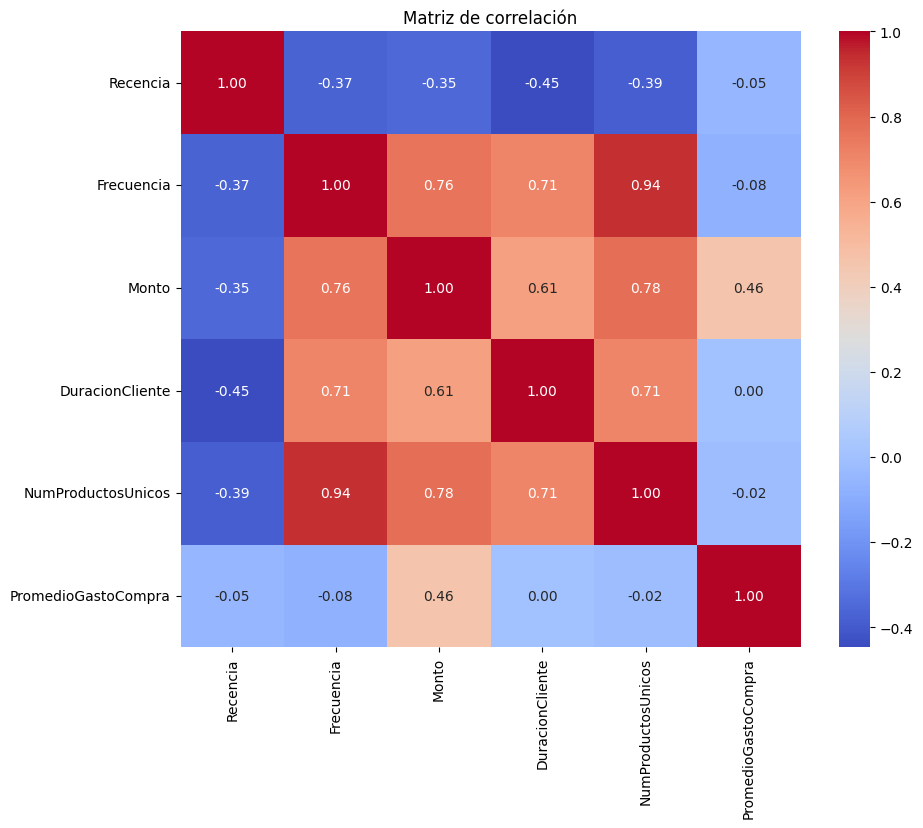

In [152]:
df_rfm=remover_outliers(df_rfm)
# Estadísticas descriptivas
print(df_rfm.describe())

# Histogramas
df_rfm.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Diagrama de dispersión de pares
sns.pairplot(df_rfm)
plt.show()

# Matriz de correlación
correlation_matrix = df_rfm.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

```
4. Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters
que pueden tener y visualizar los cluster resultantes de los algoritmos.
```

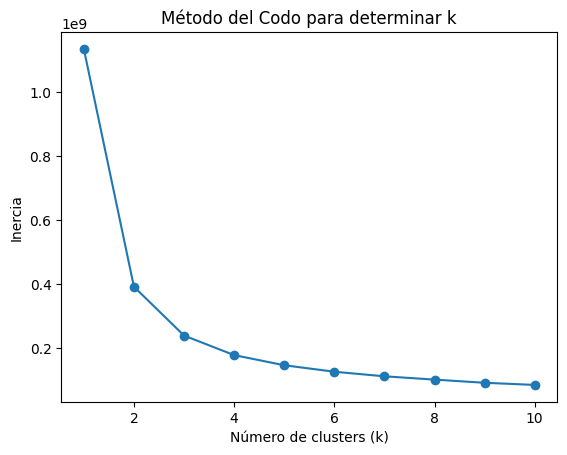

In [153]:
# Método del codo para determinar k óptimo
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm)
    inertias.append(kmeans.inertia_)

# Graficar la curva de codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()

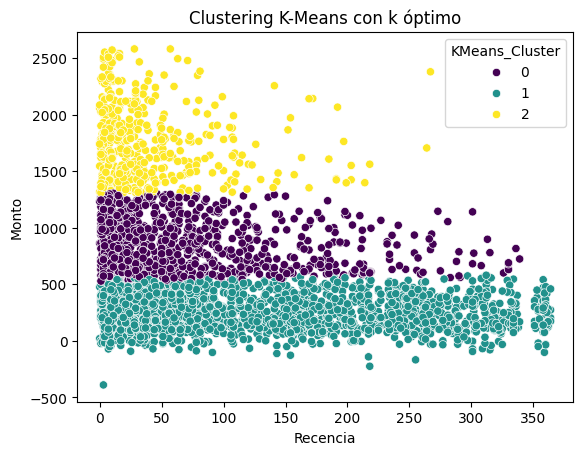

Inercia del clustering K-Means:	 238571226.02974868

Índice Silhouette:	 0.4760661492281463

Índice Davies-Bouldin:	 0.7250804415043159

Distancias pairwise entre todos los puntos:	
[[   0.          450.05396343 1342.7231529  ...  680.28418679
   579.7740604   181.30182569]
 [ 450.05396343    0.         1722.09528759 ...  381.45200589
   454.74988486  596.3690552 ]
 [1342.7231529  1722.09528759    0.         ... 1954.88599215
  1843.7559073  1197.48535356]
 ...
 [ 680.28418679  381.45200589 1954.88599215 ...    0.
   231.84856533  853.3705439 ]
 [ 579.7740604   454.74988486 1843.7559073  ...  231.84856533
     0.          752.69249749]
 [ 181.30182569  596.3690552  1197.48535356 ...  853.3705439
   752.69249749    0.        ]]


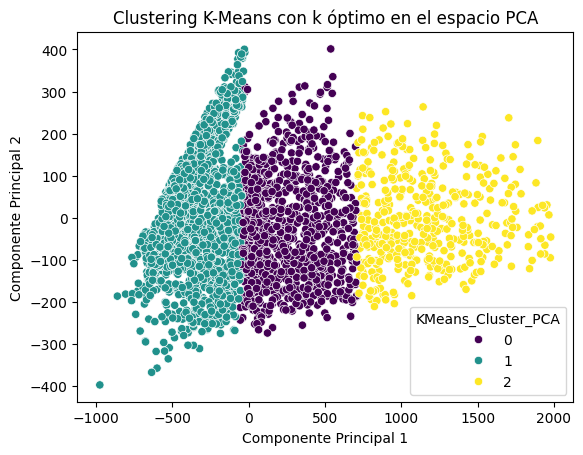

In [154]:
# Elegir el valor óptimo de k basado en el codo
# En este ejemplo, podríamos seleccionar k=3 ya que parece que después de k=3 la inercia disminuye más gradualmente
# Pero esto puede variar según el conjunto de datos específico y el contexto del problema

# Aplicar K-Means con el número óptimo de clusters
optimal_k = 3  # Aquí debes ajustar el valor óptimo de k identificado
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_rfm)

# Asignar las etiquetas de cluster a los datos
df_rfm['KMeans_Cluster'] = kmeans.labels_

# Visualizar los clusters de K-Means
sns.scatterplot(data=df_rfm, x='Recencia', y='Monto', hue='KMeans_Cluster', palette='viridis')
plt.title('Clustering K-Means con k óptimo')
plt.xlabel('Recencia')
plt.ylabel('Monto')
plt.show()

# Calcular los índices de evaluación del clustering (ejemplo: inercia)
inertia = kmeans.inertia_
print("Inercia del clustering K-Means:\t", inertia)

# Calcular el índice silhouette
silhouette = silhouette_score(df_rfm, kmeans.labels_)
print("\nÍndice Silhouette:\t", silhouette)

# Calcular el índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(df_rfm, kmeans.labels_)
print("\nÍndice Davies-Bouldin:\t", davies_bouldin)

# Calcular las distancias pairwise entre todos los puntos
distances = pairwise_distances(df_rfm)
print("\nDistancias pairwise entre todos los puntos:\t")
print(distances)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2, random_state=42)
df_rfm_pca = pca.fit_transform(df_rfm)

# Aplicar K-Means con el número óptimo de clusters a los datos reducidos por PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca.fit(df_rfm_pca)

# Asignar las etiquetas de cluster a los datos reducidos por PCA
df_rfm['KMeans_Cluster_PCA'] = kmeans_pca.labels_

# Visualizar los clusters de K-Means en el espacio reducido por PCA
sns.scatterplot(x=df_rfm_pca[:,0], y=df_rfm_pca[:,1], hue=df_rfm['KMeans_Cluster_PCA'], palette='viridis')
plt.title('Clustering K-Means con k óptimo en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



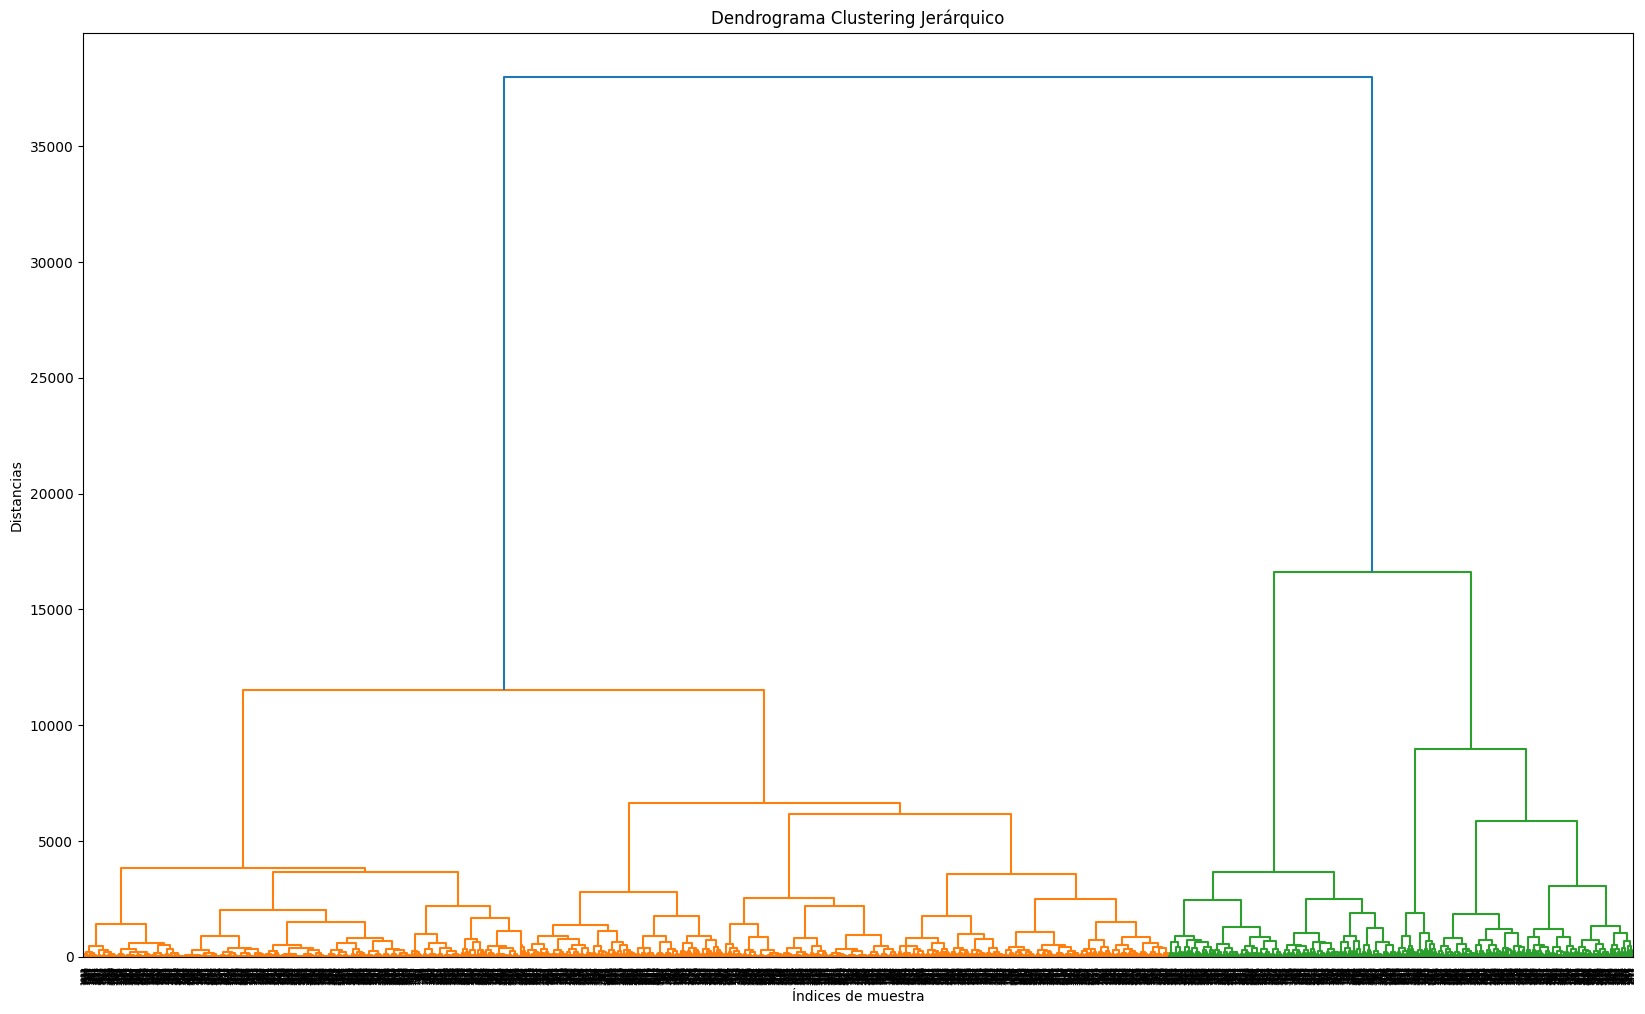

Coeficiente de correlación cophenético: 0.7046526635405019


In [155]:

# Aplicar Clustering Jerárquico
Z = linkage(df_rfm, method='ward')

# Visualizar el dendrograma del Clustering Jerárquico
plt.figure(figsize=(20, 12))
dendrogram(Z)
plt.title('Dendrograma Clustering Jerárquico')
plt.xlabel('Índices de muestra')
plt.ylabel('Distancias')
plt.show()

# Calcular los índices de evaluación del clustering jerárquico (ejemplo: coeficiente de correlación cophenético)
c, coph_dists = cophenet(Z, pdist(df_rfm))
print("Coeficiente de correlación cophenético:", c)



### Análisis para K-Means:

1. **Inercia del Clustering:**
   - La inercia del clustering es de <span style="color:blue">238,571,226.03</span>. Esto sugiere que los grupos formados por el K-Means tienen una dispersión considerable. Una inercia más baja indicaría una mejor separación de los grupos.

2. **Índice Silhouette:**
   - El índice Silhouette es de <span style="color:blue">0.476</span>. Este valor indica una separación razonablemente buena entre los grupos. Sin embargo, valores más cercanos a 1 indicarían una separación más clara entre los grupos.

3. **Índice Davies-Bouldin:**
   - El índice Davies-Bouldin es de <span style="color:blue">0.725</span>. Este valor sugiere una partición aceptable del clustering, pero podría haber margen para mejorar. Valores más bajos indicarían una mejor partición.

### Análisis para Clustering Jerárquico:

1. **Coeficiente de Correlación Cophenético:**
   - El coeficiente de correlación cophenético es de <span style="color:blue">0.705</span>. Este valor indica que el clustering jerárquico conserva razonablemente bien las distancias originales entre los pares de observaciones. Valores cercanos a 1 indicarían una mejor conservación de las distancias originales.

En general, tanto para K-Means como para clustering jerárquico, los resultados indican una separación razonable de los grupos, pero también sugieren que podría haber margen para mejorar la separación y la cohesión de los grupos. Sería recomendable realizar una exploración más detallada de los datos y ajustar los parámetros de los algoritmos de clustering para obtener resultados óptimos. Además, sería útil visualizar los clusters para comprender mejor su distribución y relaciones entre los grupos.

```
5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de
cada segmento asignándoles un nombre descriptivo.
```

In [162]:
# Definir nombres descriptivos para los segmentos
def asignar_nombre_descriptivo(cluster):
    if cluster == 0:
        return "Clientes Activos y Leales"
    elif cluster == 1:
        return "Clientes Inactivos con Gasto Alto"
    elif cluster == 2:
        return "Clientes Nuevos o Poco Frecuentes con Gasto Moderado"
    else:
        return "Otro"

# Asignar nombres descriptivos a los clusters K-Means
df_rfm['Nombre_Cluster_KMeans'] = df_rfm['KMeans_Cluster'].apply(asignar_nombre_descriptivo)

# Visualizar la distribución de clientes en cada cluster K-Means
print("Distribución de Clientes en Clusters (K-Means):")
print(df_rfm['Nombre_Cluster_KMeans'].value_counts())

Distribución de Clientes en Clusters (K-Means):
Nombre_Cluster_KMeans
Clientes Inactivos con Gasto Alto                       2059
Clientes Activos y Leales                                959
Clientes Nuevos o Poco Frecuentes con Gasto Moderado     432
Name: count, dtype: int64
